In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib as plt

In [3]:
%matplotlib inline

In [4]:
%matplotlib inline
sns.set_style("white")

In [6]:
iris_df = pd.read_csv('iris_train.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris_df = iris_df[iris_df['target'] != 'Iris-virginica']

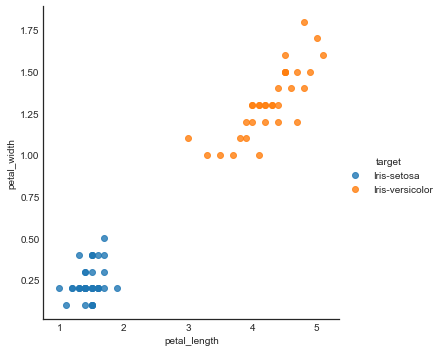

In [13]:
sns.lmplot(x='petal_length', y='petal_width', data = iris_df, hue = 'target', fit_reg = False)

## Naive Bayes

p(posterior) = 

In [18]:
total_setosa = iris_df['target'][iris_df['target'] == 'Iris-setosa'].count()
total_versicolor = iris_df['target'][iris_df['target'] == 'Iris-versicolor'].count()

In [19]:
total_versicolor

34

In [20]:
total_setosa

39

In [21]:
total = iris_df['target'].count()

In [22]:
total

73

## Probability of setosa

In [23]:
p_setosa = total_setosa/total

In [24]:
p_setosa

0.5342465753424658

## Probability of versicolor

In [26]:
p_versicolor = total_versicolor/total

In [27]:
p_versicolor

0.4657534246575342

In [30]:
data_means = iris_df.groupby('target').mean()

In [31]:
data_means 

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
Iris-setosa,5.035897,3.441026,1.461538,0.233333
Iris-versicolor,5.897059,2.755882,4.261765,1.320588


In [32]:
data_variance = iris_df.groupby('target').var()

In [33]:
data_variance

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
Iris-setosa,0.134467,0.136167,0.030324,0.010175
Iris-versicolor,0.193021,0.077692,0.220009,0.041684


In [39]:
# Means of setosa
setosa_petal_length_mean = data_means['petal_length']\
[data_means.index == 'Iris-setosa'].values[0]
setosa_petal_width_mean = data_means['petal_width']\
[data_means.index == 'Iris-setosa'].values[0]

In [40]:
setosa_petal_length_mean

1.4615384615384615

In [41]:
setosa_petal_width_mean

0.23333333333333328

In [42]:
# Variance of setosa
setosa_petal_length_variance = data_variance['petal_length']\
[data_variance.index == 'Iris-setosa'].values[0]
setosa_petal_width_variance = data_variance['petal_width']\
[data_variance.index == 'Iris-setosa'].values[0]

In [43]:
setosa_petal_length_variance

0.030323886639676136

In [44]:
setosa_petal_width_variance

0.010175438596491232

In [45]:
# Means of versicolor
versicolor_petal_length_mean = data_means['petal_length']\
[data_means.index == 'Iris-versicolor'].values[0]
versicolor_petal_width_mean = data_means['petal_width']\
[data_means.index == 'Iris-versicolor'].values[0]

In [46]:
# Variance of versicolor
versicolor_petal_length_variance = data_variance['petal_length']\
[data_variance.index == 'Iris-versicolor'].values[0]
versicolor_petal_width_variance = data_variance['petal_width']\
[data_variance.index == 'Iris-versicolor'].values[0]

## Step to calculate liklihood

In [52]:
def p_x_given_y(x, mean_y, variance_y):
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
           
    return p

In [54]:
iris_test_df = pd.read_csv('iris_test.csv')

In [55]:
iris_test_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.4,1.5,0.2,Iris-setosa
1,5.0,3.5,1.3,0.3,Iris-setosa
2,4.5,2.3,1.3,0.3,Iris-setosa
3,4.4,3.2,1.3,0.2,Iris-setosa
4,5.0,3.5,1.6,0.6,Iris-setosa
5,5.1,3.8,1.9,0.4,Iris-setosa
6,4.8,3.0,1.4,0.3,Iris-setosa
7,5.1,3.8,1.6,0.2,Iris-setosa
8,4.6,3.2,1.4,0.2,Iris-setosa
9,5.3,3.7,1.5,0.2,Iris-setosa


## P(data|setosa) = 
## P(petal_length|setosa).P(petal_width|setosa)

In [59]:
p_setosa * p_x_given_y(iris_test_df['petal_length'][0], setosa_petal_length_mean, setosa_petal_length_variance) * \
p_x_given_y(iris_test_df['petal_width'][0], setosa_petal_width_mean, setosa_petal_width_variance)

4.4728908950433

In [60]:
p_versicolor * p_x_given_y(iris_test_df['petal_length'][0], versicolor_petal_length_mean, versicolor_petal_length_variance) * \
p_x_given_y(iris_test_df['petal_width'][0], versicolor_petal_width_mean, versicolor_petal_width_variance)

6.5950128080511185e-15

In [61]:
iris_test_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.4,1.5,0.2,Iris-setosa
1,5.0,3.5,1.3,0.3,Iris-setosa
2,4.5,2.3,1.3,0.3,Iris-setosa
3,4.4,3.2,1.3,0.2,Iris-setosa
4,5.0,3.5,1.6,0.6,Iris-setosa
5,5.1,3.8,1.9,0.4,Iris-setosa
6,4.8,3.0,1.4,0.3,Iris-setosa
7,5.1,3.8,1.6,0.2,Iris-setosa
8,4.6,3.2,1.4,0.2,Iris-setosa
9,5.3,3.7,1.5,0.2,Iris-setosa
